In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.simplefilter("ignore")
import scipy.stats as stats

In [2]:
train = pd.read_csv("Train.csv")
test = pd.read_csv("Test.csv")
submission = pd.read_csv("SampleSubmission.csv")

In [3]:
data = pd.concat([train,test],sort=False).reset_index(drop=True)

In [4]:
data.head()

,ID,country,year,urban_or_rural,ghsl_water_surface,ghsl_built_pre_1975,ghsl_built_1975_to_1990,ghsl_built_1990_to_2000,ghsl_built_2000_to_2014,ghsl_not_built_up,ghsl_pop_density,landcover_crops_fraction,landcover_urban_fraction,landcover_water_permanent_10km_fraction,landcover_water_seasonal_10km_fraction,nighttime_lights,dist_to_capital,dist_to_shoreline,Target
0,ID_AAIethGy,Ethiopia,2016,R,0.0,0.000000,0.000000,0.000055,0.000536,0.999408,12.146134,25.489659,0.879484,0.000000,0.000000,0.000000,278.788451,769.338378,0.132783
1,ID_AAYiaCeL,Ethiopia,2005,R,0.0,0.000000,0.000110,0.000000,0.000018,0.999872,113.806716,64.136053,0.601427,0.000000,0.005427,0.000000,200.986978,337.135243,0.004898
2,ID_AAdurmKj,Mozambique,2009,R,0.0,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,4.400096,0.131900,0.000000,0.003078,0.000000,642.594208,169.913773,0.097320
3,ID_AAgNHles,Malawi,2015,R,0.0,0.000141,0.000181,0.000254,0.000228,0.999195,5.213320,25.379371,2.017136,11.293841,0.131035,0.000000,365.349451,613.591610,0.304107
4,ID_AAishfND,Guinea,2012,U,0.0,0.011649,0.017560,0.017383,0.099875,0.853533,31.734661,5.081620,22.815984,0.005047,0.130475,1.461894,222.867189,192.926363,0.605328


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28648 entries, 0 to 28647
Data columns (total 19 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   ID                                       28648 non-null  object 
 1   country                                  28648 non-null  object 
 2   year                                     28648 non-null  int64  
 3   urban_or_rural                           28648 non-null  object 
 4   ghsl_water_surface                       28648 non-null  float64
 5   ghsl_built_pre_1975                      28648 non-null  float64
 6   ghsl_built_1975_to_1990                  28648 non-null  float64
 7   ghsl_built_1990_to_2000                  28648 non-null  float64
 8   ghsl_built_2000_to_2014                  28648 non-null  float64
 9   ghsl_not_built_up                        28648 non-null  float64
 10  ghsl_pop_density                         28648

In [6]:
data.shape

(28648, 19)

In [7]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
year,28648.0,2010.271537,4.553145,1994.000000,2008.000000,2011.000000,2014.000000,2016.000000
ghsl_water_surface,28648.0,0.027018,0.095199,0.000000,0.000000,0.000000,0.000000,0.991100
ghsl_built_pre_1975,28648.0,0.041010,0.118721,0.000000,0.000000,0.000160,0.008011,0.894608
ghsl_built_1975_to_1990,28648.0,0.027820,0.072850,0.000000,0.000000,0.000602,0.010037,0.685010
ghsl_built_1990_to_2000,28648.0,0.013713,0.034208,0.000000,0.000037,0.000936,0.008823,0.515534
ghsl_built_2000_to_2014,28648.0,0.018369,0.040241,0.000000,0.000109,0.001727,0.015209,0.649159
ghsl_not_built_up,28648.0,0.872069,0.242707,0.000859,0.895615,0.992725,0.999592,1.000000
ghsl_pop_density,28648.0,95.101508,210.079701,0.000000,2.943082,16.424158,64.364772,1902.876955
landcover_crops_fraction,28648.0,21.097237,16.309999,0.000000,6.105505,19.297194,33.199903,80.064918
landcover_urban_fraction,28648.0,14.079153,23.917510,0.000000,0.705307,2.599028,13.063126,98.784092


In [8]:
data.isnull().any()

ID                                         False
country                                    False
year                                       False
urban_or_rural                             False
ghsl_water_surface                         False
ghsl_built_pre_1975                        False
ghsl_built_1975_to_1990                    False
ghsl_built_1990_to_2000                    False
ghsl_built_2000_to_2014                    False
ghsl_not_built_up                          False
ghsl_pop_density                           False
landcover_crops_fraction                   False
landcover_urban_fraction                   False
landcover_water_permanent_10km_fraction    False
landcover_water_seasonal_10km_fraction     False
nighttime_lights                           False
dist_to_capital                            False
dist_to_shoreline                          False
Target                                      True
dtype: bool

In [ ]:
data.fillna(method="ffill", limit=1, inplace=True)

In [9]:
data.duplicated().any()

False

In [10]:
#import preprocessing module 

from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
data['urban_or_rural'] = le.fit_transform(data['urban_or_rural'])
data['country'] = le.fit_transform(data['country'])

In [11]:
# convert float dtypes to int
data["ghsl_water_surface"] = data['ghsl_water_surface'].apply(np.int64)
data["ghsl_built_pre_1975"] = data['ghsl_built_pre_1975'].apply(np.int64)
data["ghsl_built_1990_to_2000"] = data["ghsl_built_1990_to_2000"].apply(np.int64)
data["ghsl_built_2000_to_2014"] = data["ghsl_built_2000_to_2014"].apply(np.int64)
data["ghsl_not_built_up"] = data["ghsl_not_built_up"].apply(np.int64)
data["ghsl_pop_density"] = data["ghsl_pop_density"].apply(np.int64) 
data["landcover_crops_fraction"] = data["landcover_crops_fraction"].apply(np.int64)
data["landcover_urban_fraction"] = data["landcover_urban_fraction"].apply(np.int64)
data["landcover_water_permanent_10km_fraction"] = data["landcover_water_permanent_10km_fraction"].apply(np.int64)
data["landcover_water_seasonal_10km_fraction"] = data["landcover_water_seasonal_10km_fraction"].apply(np.int64)
data["nighttime_lights"] = data["nighttime_lights"].apply(np.int64) 
data["dist_to_shoreline"] = data["dist_to_shoreline"].apply(np.int64)
data["ghsl_built_1975_to_1990"] = data["ghsl_built_1975_to_1990"].apply(np.int64)
data["dist_to_capital"] = data["dist_to_capital"].apply(np.int64)


In [12]:
## separating data into train and test
train=data[data.Target.notnull()].reset_index(drop=True)
test=data[data.Target.isna()].reset_index(drop=True)

In [13]:
train.shape , test.shape

((21454, 19), (7194, 19))

In [14]:
feat_cols = train.drop(["ID","Target"],1)
cols = feat_cols.columns
target=train["Target"]

In [15]:
train[cols].shape , target.shape

((21454, 17), (21454,))

In [16]:
# function to create histogram, Q-Q plot and
# boxplot. We learned this in section 3 of the course


def diagnostic_plots(df, variable):
    # function takes a dataframe (df) and
    # the variable of interest as arguments

    # define figure size
    plt.figure(figsize=(16, 4))

    # histogram
    plt.subplot(1, 3, 1)
    sns.histplot(df[variable], bins=30)
    plt.title('Histogram')

    # Q-Q plot
    plt.subplot(1, 3, 2)
    stats.probplot(df[variable], dist="norm", plot=plt)
    plt.ylabel('Variable quantiles')

    # boxplot
    plt.subplot(1, 3, 3)
    sns.boxplot(y=df[variable])
    plt.title('Boxplot')

    plt.show()

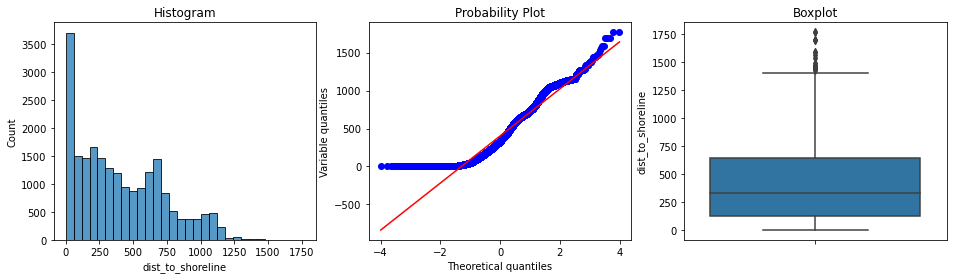

In [17]:
# let's find outliers in DS

diagnostic_plots(train, 'dist_to_shoreline')

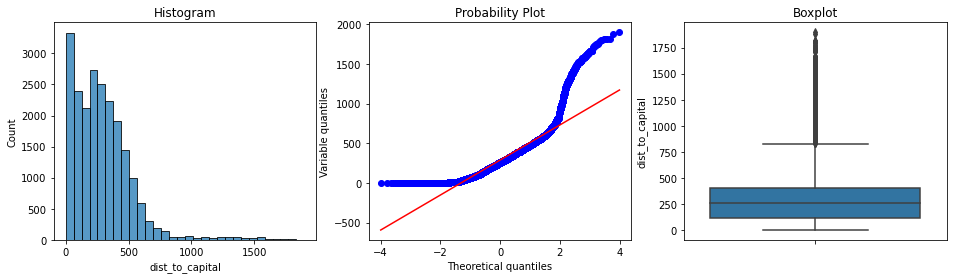

In [18]:
diagnostic_plots(train, 'dist_to_capital')

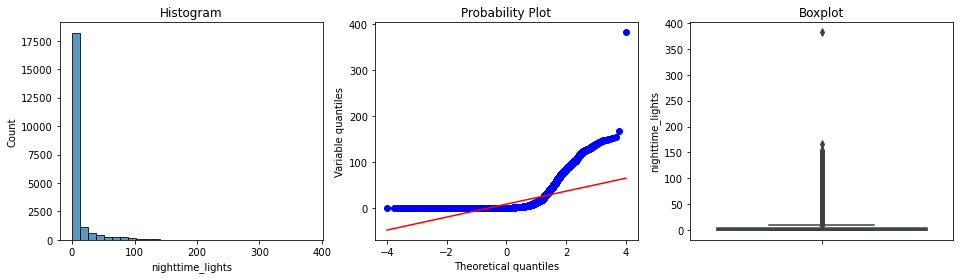

In [19]:
diagnostic_plots(train, 'nighttime_lights')

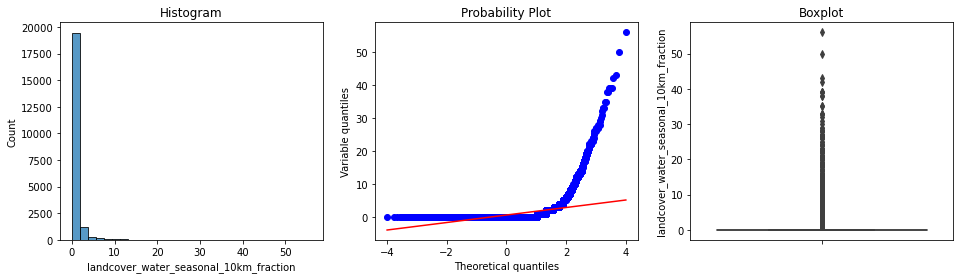

In [20]:
diagnostic_plots(train, 'landcover_water_seasonal_10km_fraction')

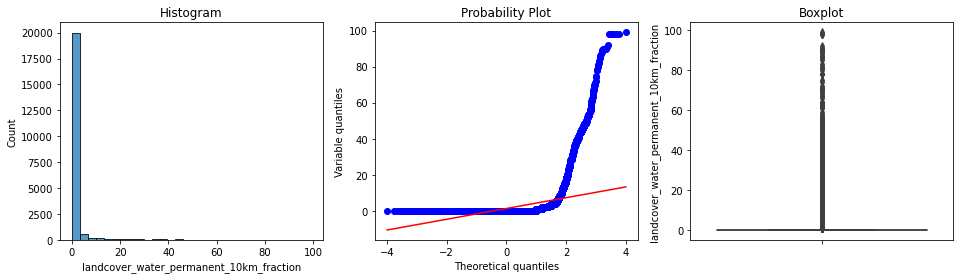

In [21]:
diagnostic_plots(train, 'landcover_water_permanent_10km_fraction')

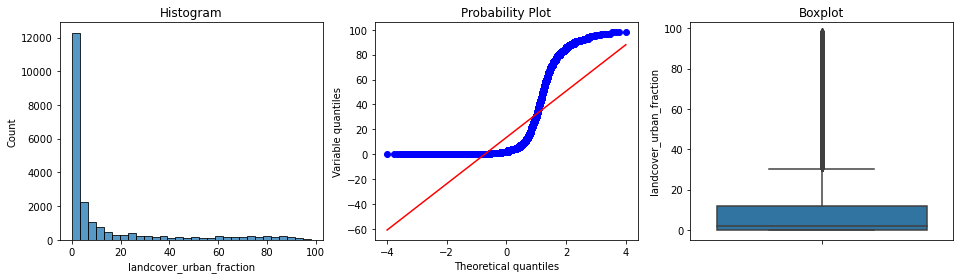

In [22]:
diagnostic_plots(train, 'landcover_urban_fraction')

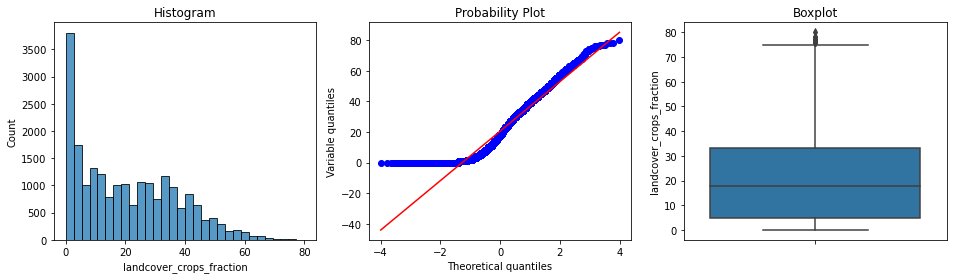

In [23]:
diagnostic_plots(train, 'landcover_crops_fraction')

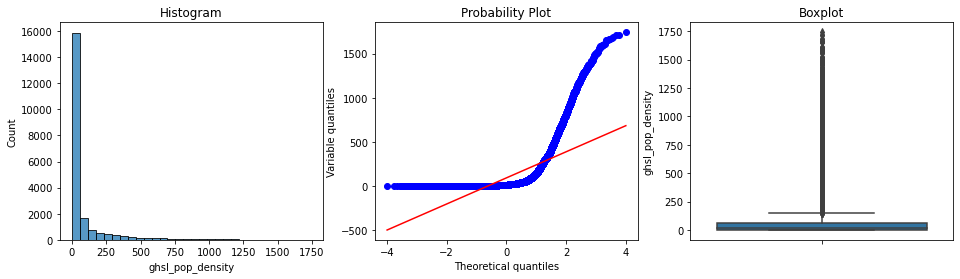

In [24]:
diagnostic_plots(train, 'ghsl_pop_density')

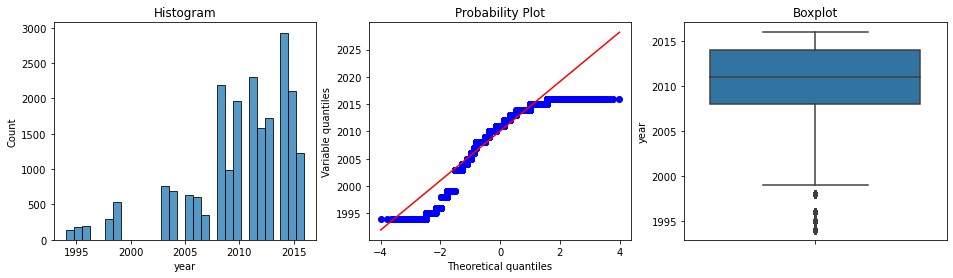

In [25]:
diagnostic_plots(train, 'year')

In [26]:
def find_skewed_boundaries(df, variable, distance):

    # Let's calculate the boundaries outside which sit the outliers
    # for skewed distributions

    # distance passed as an argument, gives us the option to
    # estimate 1.5 times or 3 times the IQR to calculate
    # the boundaries.

    IQR = df[variable].quantile(0.75) - df[variable].quantile(0.25)

    lower_boundary = df[variable].quantile(0.25) - (IQR * distance)
    upper_boundary = df[variable].quantile(0.75) + (IQR * distance)

    return upper_boundary, lower_boundary

In [27]:
# find limits for dist_to_shoreline

DS_upper_limit, DS_lower_limit = find_skewed_boundaries(train, 'dist_to_shoreline', 1.5)
DS_upper_limit, DS_lower_limit

(1418.5, -649.5)

In [28]:
# find limits for dist_to_capital 

DC_upper_limit, DC_lower_limit = find_skewed_boundaries(train, 'dist_to_capital', 1.5)
DC_upper_limit, DC_lower_limit

(830.0, -314.0)

In [29]:
# find limits for nighttime_lights

NL_upper_limit, NL_lower_limit = find_skewed_boundaries(train, 'nighttime_lights', 1.5)
NL_upper_limit, NL_lower_limit

(10.0, -6.0)

In [30]:
# find limits for landcover_water_seasonal_10km_fraction

LWS_upper_limit, LWS_lower_limit = find_skewed_boundaries(train, 'landcover_water_seasonal_10km_fraction', 1.5)
LWS_upper_limit, LWS_lower_limit

(0.0, 0.0)

In [31]:
# find limits for landcover_water_permanent_10km_fraction

LWP_upper_limit, LWP_lower_limit = find_skewed_boundaries(train, 'landcover_water_permanent_10km_fraction', 1.5)
LWP_upper_limit, LWP_lower_limit

(0.0, 0.0)

In [32]:
# find limits for landcover_urban_fraction

LU_upper_limit, LU_lower_limit = find_skewed_boundaries(train, 'landcover_urban_fraction', 1.5)
LU_upper_limit, LU_lower_limit

(30.0, -18.0)

In [33]:
# find limits for landcover_crops_fraction

LC_upper_limit, LC_lower_limit = find_skewed_boundaries(train, 'landcover_crops_fraction', 1.5)
LC_upper_limit, LC_lower_limit

(75.0, -37.0)

In [34]:
# find limits for lghsl_pop_density

PD_upper_limit, PD_lower_limit = find_skewed_boundaries(train, 'ghsl_pop_density', 1.5)
PD_upper_limit, PD_lower_limit

(153.0, -87.0)

In [35]:
y_upper_limit, y_lower_limit = find_skewed_boundaries(train, 'year', 1.5)
y_upper_limit, y_lower_limit

(2023.0, 1999.0)

In [36]:
 #Now let's replace the outliers by the maximum and minimum limit

train['dist_to_shoreline']= np.where(train['dist_to_shoreline'] > DS_upper_limit, DS_upper_limit,
                       np.where(train['dist_to_shoreline'] < DS_lower_limit, DS_lower_limit, train['dist_to_shoreline']))

In [37]:
train['dist_to_capital']= np.where(train['dist_to_capital'] > DC_upper_limit, DC_upper_limit,
                       np.where(train['dist_to_capital'] < DC_lower_limit, DC_lower_limit, train['dist_to_capital']))

In [38]:
train[' nighttime_lights']= np.where(train['nighttime_lights'] > NL_upper_limit, NL_upper_limit,
                       np.where(train['nighttime_lights'] < NL_lower_limit, NL_lower_limit, train['nighttime_lights']))

In [39]:
train['landcover_water_seasonal_10km_fraction']= np.where(train['landcover_water_seasonal_10km_fraction'] > LWS_upper_limit, LWS_upper_limit,
                       np.where(train['landcover_water_seasonal_10km_fraction'] < LWS_lower_limit, LWS_lower_limit, train['landcover_water_seasonal_10km_fraction']))

In [40]:
train['landcover_water_permanent_10km_fraction']= np.where(train['landcover_water_permanent_10km_fraction'] > LWP_upper_limit, LWP_upper_limit,
                       np.where(train['landcover_water_permanent_10km_fraction'] < LWP_lower_limit, LWP_lower_limit, train['landcover_water_permanent_10km_fraction']))

In [41]:
train['landcover_urban_fraction']= np.where(train['landcover_urban_fraction'] > LU_upper_limit, LU_upper_limit,
                       np.where(train['landcover_urban_fraction'] < LU_lower_limit, LU_lower_limit, train['landcover_urban_fraction']))

In [42]:
train['landcover_crops_fraction']= np.where(train['landcover_crops_fraction'] > LC_upper_limit, LC_upper_limit,
                       np.where(train['landcover_crops_fraction'] < LC_lower_limit, LC_lower_limit, train['landcover_crops_fraction']))

In [43]:
train['year']= np.where(train['year'] > y_upper_limit, y_upper_limit,
                       np.where(train['year'] < y_lower_limit, y_lower_limit, train['year']))

In [44]:
train['ghsl_pop_density']= np.where(train['ghsl_pop_density'] > PD_upper_limit, PD_upper_limit,
                       np.where(train['ghsl_pop_density'] < PD_lower_limit, PD_lower_limit, train['ghsl_pop_density']))

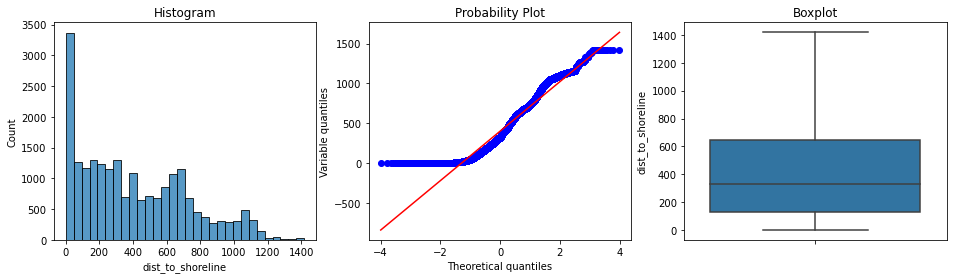

In [45]:
# let's explore outliers in the trimmed dataset
# for DS we see much less outliers as in the original dataset
diagnostic_plots(train, 'dist_to_shoreline')

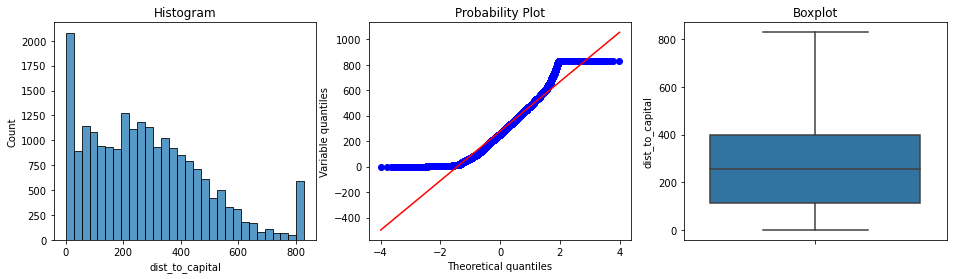

In [46]:
diagnostic_plots(train, 'dist_to_capital')

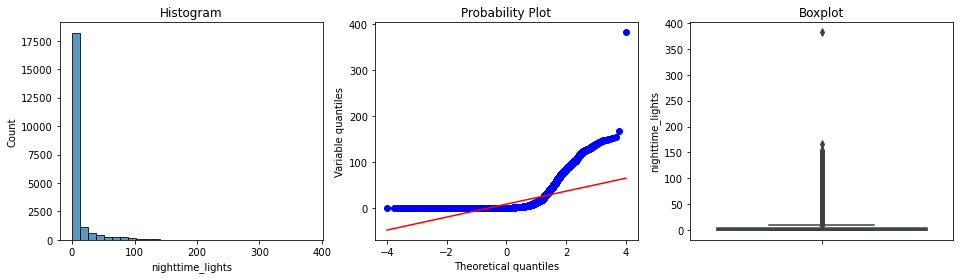

In [47]:
diagnostic_plots(train, 'nighttime_lights')

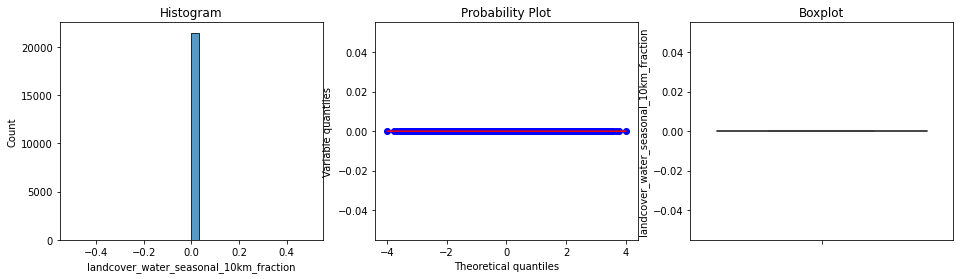

In [48]:
diagnostic_plots(train,'landcover_water_seasonal_10km_fraction')

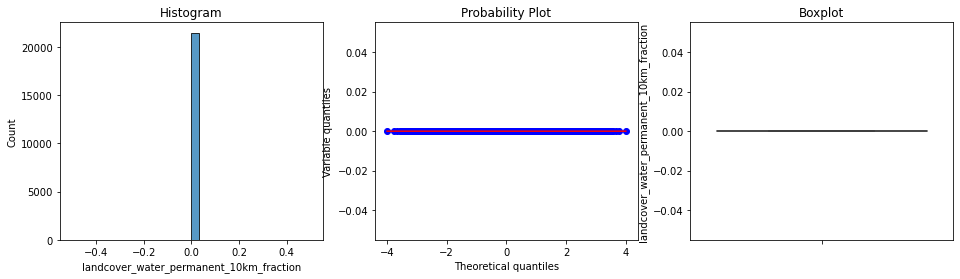

In [49]:
diagnostic_plots(train,'landcover_water_permanent_10km_fraction')

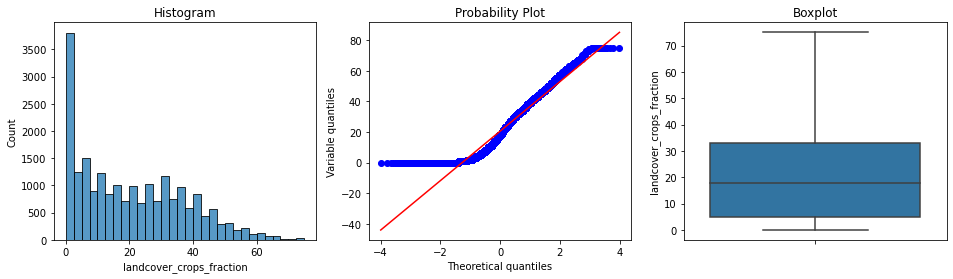

In [50]:
diagnostic_plots(train,'landcover_crops_fraction')

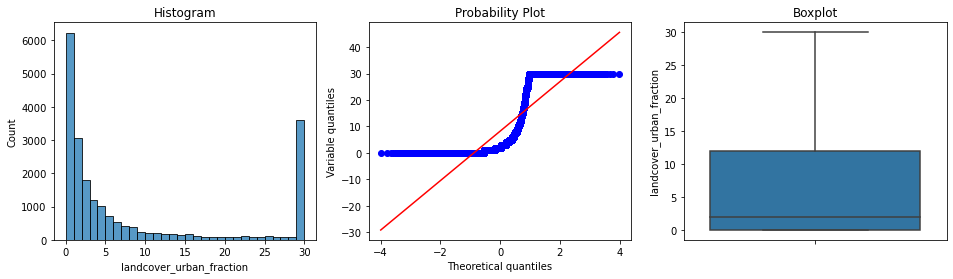

In [51]:
diagnostic_plots(train,'landcover_urban_fraction')

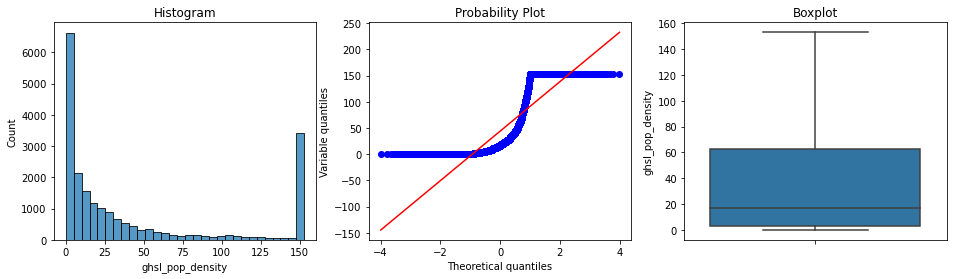

In [52]:
diagnostic_plots(train,'ghsl_pop_density')

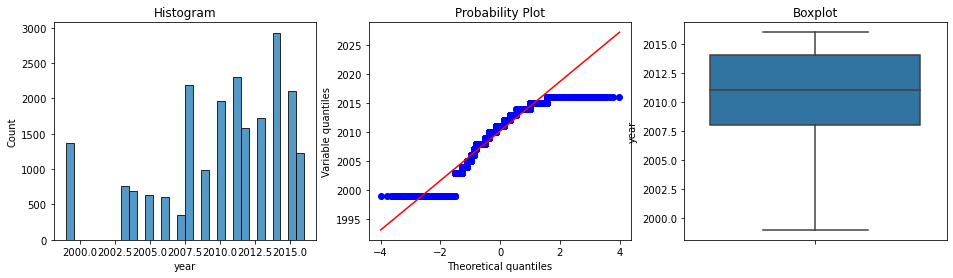

In [53]:
diagnostic_plots(train, 'year')

In [54]:
# create training and testing vars
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(train[cols],target, test_size=0.20, random_state = 2021)
print (X_train.shape, y_train.shape)
print (X_test.shape, y_test.shape)

(17163, 17) (17163,)
(4291, 17) (4291,)


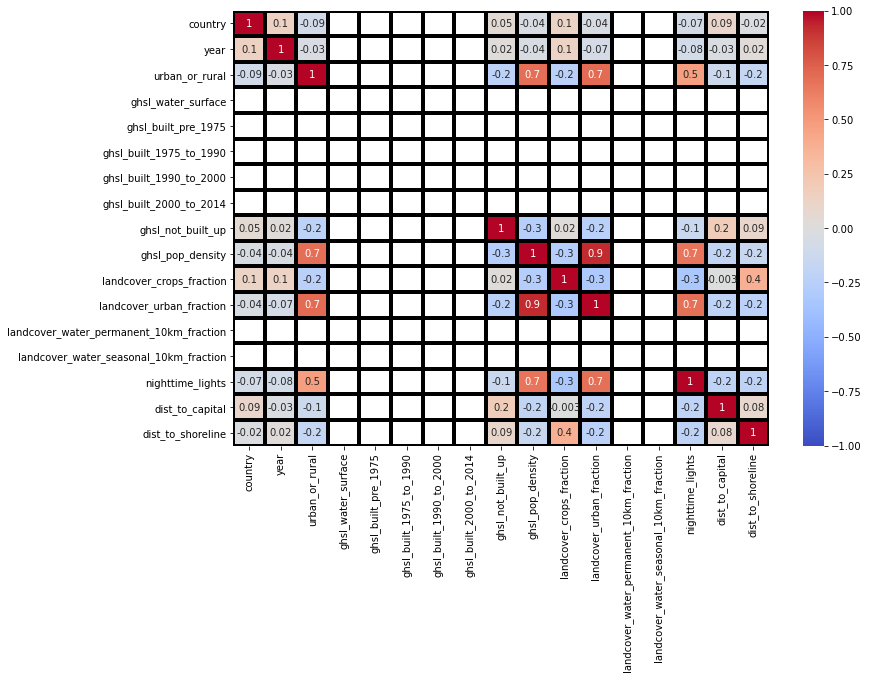

In [55]:
## using pearson correlation
plt.figure(figsize = (12,8))
ax=sns.heatmap(X_train.corr(),annot=True,fmt='.1g',vmin=-1, vmax=1, center= 0,cmap= 'coolwarm', linewidths=3, linecolor='black')


In [56]:
## Selecting the high correlated feature using a function below
def correlation(dataset,threshold):
    col_corr = set() ## set of all correlated columns
    corr_matrix =dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if (corr_matrix.iloc[i,j])> threshold:
                colname= corr_matrix.columns[i] ##get name of correlated columns
                col_corr.add(colname)
                return col_corr

In [57]:
corr_features = correlation(X_train,0.8)
len(set(corr_features))

1

In [58]:
corr_features

{'landcover_urban_fraction'}

In [59]:
X_train.drop(corr_features,1)
X_test.drop(corr_features,1)

,country,year,urban_or_rural,ghsl_water_surface,ghsl_built_pre_1975,ghsl_built_1975_to_1990,ghsl_built_1990_to_2000,ghsl_built_2000_to_2014,ghsl_not_built_up,ghsl_pop_density,landcover_crops_fraction,landcover_water_permanent_10km_fraction,landcover_water_seasonal_10km_fraction,nighttime_lights,dist_to_capital,dist_to_shoreline
13337,15,2003.0,0,0,0,0,0,0,0,106.0,40.0,0.0,0.0,1,436.0,832.0
21042,15,2015.0,1,0,0,0,0,0,0,153.0,7.0,0.0,0.0,21,187.0,311.0
12597,10,2015.0,0,0,0,0,0,0,0,33.0,41.0,0.0,0.0,0,351.0,756.0
6923,20,2016.0,0,0,0,0,0,0,0,18.0,10.0,0.0,0.0,0,370.0,45.0
4940,8,2014.0,0,0,0,0,0,0,0,14.0,1.0,0.0,0.0,1,251.0,89.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17624,8,2008.0,1,0,0,0,0,0,0,40.0,31.0,0.0,0.0,4,148.0,25.0
1580,15,2008.0,0,0,0,0,0,0,0,1.0,11.0,0.0,0.0,0,471.0,78.0
3173,11,2014.0,1,0,0,0,0,0,0,78.0,21.0,0.0,0.0,20,7.0,322.0
13296,10,2015.0,0,0,0,0,0,0,0,5.0,12.0,0.0,0.0,0,392.0,36.0


In [60]:
from xgboost import XGBRegressor

In [61]:
#instatiate the model
xgb=XGBRegressor(objective ='reg:linear', n_estimators= 100,verbosity = 0, colsample_bynode = 0.8, learning_rate = 0.004,max_depth =  7)


# feature extraction
from sklearn.feature_selection import RFE
rfe = RFE(xgb, n_features_to_select=14)
rfe.fit(X_train, y_train)
rfe.support_
rfe.ranking_
pd.DataFrame(rfe.support_,index=X_train.columns,columns=["Rank"])
pd.DataFrame(rfe.ranking_,index=X_train.columns,columns=["Rank"]).sort_values(by="Rank",ascending=True)


#y_pred = xgb.predict(X_test)
#Evaluation
#from sklearn.metrics import mean_absolute_error
#mae = mean_absolute_error(y_test, y_pred)
#print('Using scikit-lean, the error is {}'.format(mae))

,Rank
country,1
nighttime_lights,1
landcover_water_permanent_10km_fraction,1
landcover_urban_fraction,1
landcover_crops_fraction,1
ghsl_pop_density,1
dist_to_capital,1
ghsl_not_built_up,1
ghsl_built_1990_to_2000,1
ghsl_built_1975_to_1990,1


In [62]:
X_train = X_train.drop(["landcover_water_seasonal_10km_fraction","ghsl_water_surface","ghsl_built_pre_1975"],1)
X_test = X_test.drop(["landcover_water_seasonal_10km_fraction","ghsl_water_surface","ghsl_built_pre_1975"],1)

In [65]:
xgb.fit(X_train, y_train)
y_pred = xgb.predict(X_test)
#Evaluation
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y_test, y_pred)
print('Using scikit-lean, the error is {}'.format(mae))

Using scikit-lean, the error is 0.15960367812936718


In [67]:
#Prediction
pred = test.
predictions_xgb  = xgb.predict(pred)

ValueError: Feature shape mismatch, expected: 14, got 7194

In [ ]:
predictions_xgb